# Relational Data Case Study

In [1]:
# Loading Modules and 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

flights = pd.read_csv("Data_3/flights.csv")
airlines = pd.read_csv("Data_3/airline.csv")
airports = pd.read_csv("Data_3/airports.csv")
planes = pd.read_csv("Data_3/planes.csv")
weather = pd.read_csv("Data_3/weather.csv") 

<hr style="border:1px solid pink">

In [2]:
# Smaller dataset
flights_small = flights.\
filter(["year", "month", "day", "hour", 
        "origin", "dest", "tailnum", "carrier"])

<hr style="border:1px solid pink">

Check the keys for data tables flights, planes, airlines, airports, and weather

* `flights` connects to `planes` via a single variable, tailnum.
* `flights` connects to `airlines` through the carrier variable.
* `flights` connects to `airports` in two ways: via the origin and dest variables.
* `flights` connects to `weather` via origin (the location), and year, month, day and hour (the time).


<hr style="border:1px solid black">

1. Join the data table flight2 and airlines retaining all observations in flights and intersection of the datatables.

In [3]:
flights_small.drop(['origin', 'dest'], axis = 1).\
merge(airlines, on = 'carrier', how = "left")

,year,month,day,hour,tailnum,carrier,name
0,2013,1,1,5,N14228,UA,United Air Lines Inc.
1,2013,1,1,5,N24211,UA,United Air Lines Inc.
2,2013,1,1,5,N619AA,AA,American Airlines Inc.
3,2013,1,1,5,N804JB,B6,JetBlue Airways
4,2013,1,1,6,N668DN,DL,Delta Air Lines Inc.
...,...,...,...,...,...,...,...
336771,2013,9,30,14,NaN,9E,Endeavor Air Inc.
336772,2013,9,30,22,NaN,9E,Endeavor Air Inc.
336773,2013,9,30,12,N535MQ,MQ,Envoy Air
336774,2013,9,30,11,N511MQ,MQ,Envoy Air


<hr style="border:1px solid black">

2. Add weather information to flights_small datatable. What are the keys?

In [4]:
flights_small.merge(weather, how = "left",
                   on = ["year", "month", "day", "hour", "origin"])

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
1,2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01T10:00:00Z
2,2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
3,2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
4,2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,68.00,55.04,63.21,190.0,11.50780,NaN,0.0,1016.6,10.0,2013-09-30T18:00:00Z
336772,2013,9,30,22,LGA,SYR,NaN,9E,64.94,53.06,65.37,200.0,6.90468,NaN,0.0,1015.8,10.0,2013-10-01T02:00:00Z
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,69.08,48.02,46.99,70.0,5.75390,NaN,0.0,1016.7,10.0,2013-09-30T16:00:00Z
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,66.92,48.92,52.35,70.0,8.05546,NaN,0.0,1017.5,10.0,2013-09-30T15:00:00Z


<hr style="border:1px solid black">

3. Add airplane information  to flights_small datatable.

In [5]:
flights_small.merge(planes, on = "tailnum", how = "left")

,year_x,month,day,hour,origin,dest,tailnum,carrier,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,5,EWR,IAH,N14228,UA,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,5,LGA,IAH,N24211,UA,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,5,JFK,MIA,N619AA,AA,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,5,JFK,BQN,N804JB,B6,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,6,LGA,ATL,N668DN,DL,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336772,2013,9,30,22,LGA,SYR,NaN,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr style="border:1px solid black">

4. Add airport information  to flights_small datatable.

In [6]:
# The question doesnot determing if its origin or dest airports
flights_small.merge(airports, how = "left", 
                    left_on = "dest", right_on = "faa")

flights_small.merge(airports, how = "left", 
                    left_on = "origin", right_on = "faa")

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,5,EWR,IAH,N14228,UA,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York
1,2013,1,1,5,LGA,IAH,N24211,UA,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York
2,2013,1,1,5,JFK,MIA,N619AA,AA,JFK,John F Kennedy Intl,40.639751,-73.778925,13,-5,A,America/New_York
3,2013,1,1,5,JFK,BQN,N804JB,B6,JFK,John F Kennedy Intl,40.639751,-73.778925,13,-5,A,America/New_York
4,2013,1,1,6,LGA,ATL,N668DN,DL,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,JFK,John F Kennedy Intl,40.639751,-73.778925,13,-5,A,America/New_York
336772,2013,9,30,22,LGA,SYR,NaN,9E,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York


<hr style="border:1px solid black">

5. Add the location of the origin and destination (i.e. the lat and lon) to flights_small.

In [7]:
airports_1 = airports.filter(["faa", "lat", "lon"])

merged_df = flights_small.merge(airports_1, how = "left",
                   left_on = "origin", right_on = "faa").\
merge(airports, how = "left",
      left_on = "dest", right_on = "faa",
     suffixes = ("_origin", "_dest"))

# Checking if the merge worked
merged_df.filter(["origin", "dest", "faa_origin", "faa_dest"])

,origin,dest,faa_origin,faa_dest
0,EWR,IAH,EWR,IAH
1,LGA,IAH,LGA,IAH
2,JFK,MIA,JFK,MIA
3,JFK,BQN,JFK,NaN
4,LGA,ATL,LGA,ATL
...,...,...,...,...
336771,JFK,DCA,JFK,DCA
336772,LGA,SYR,LGA,SYR
336773,LGA,BNA,LGA,BNA
336774,LGA,CLE,LGA,CLE


<hr style="border:1px solid black">

6. Is there a relationship between the age of a plane and its delays?

In [8]:
# Step 1: Get the dataframe ready
flights3 = flights.filter(["tailnum","year","dep_delay", "arr_delay"])

planes3 = planes.filter(["tailnum", "year"]).\
rename(columns = {"year": "plane_year"})

fli_pla_3 = flights3.merge(planes3, on = "tailnum", how = "inner")

plane_age_delay = fli_pla_3.\
assign(age = fli_pla_3.year - fli_pla_3.plane_year).\
query('age.notnull()').groupby('age').\
agg({'dep_delay':'mean', 
     'arr_delay': 'mean',
     'tailnum':'count'}).\
reset_index().rename(columns = {'tailnum':'n',
                     'dep_delay': 'dep_delay_mean',
                     'arr_delay': 'arr_delay_mean'})

plane_age_delay.head()

,age,dep_delay_mean,arr_delay_mean,n
0,0.0,10.587102,4.006506,4630
1,1.0,9.642778,2.850889,7252
2,2.0,11.840951,5.696238,6046
3,3.0,12.534551,5.175285,3797
4,4.0,10.957321,4.920724,6632


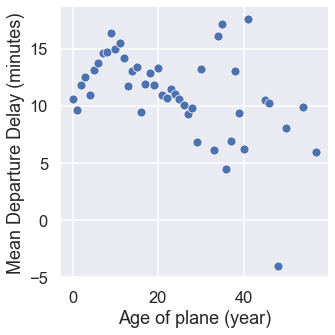

In [9]:
# Graph to answer the question
sns.set("talk")
g = sns.relplot(data = plane_age_delay, x='age', y='dep_delay_mean',
               kind='scatter')

g.set_xlabels("Age of plane (year)")
g.set_ylabels("Mean Departure Delay (minutes)")

plt.show()

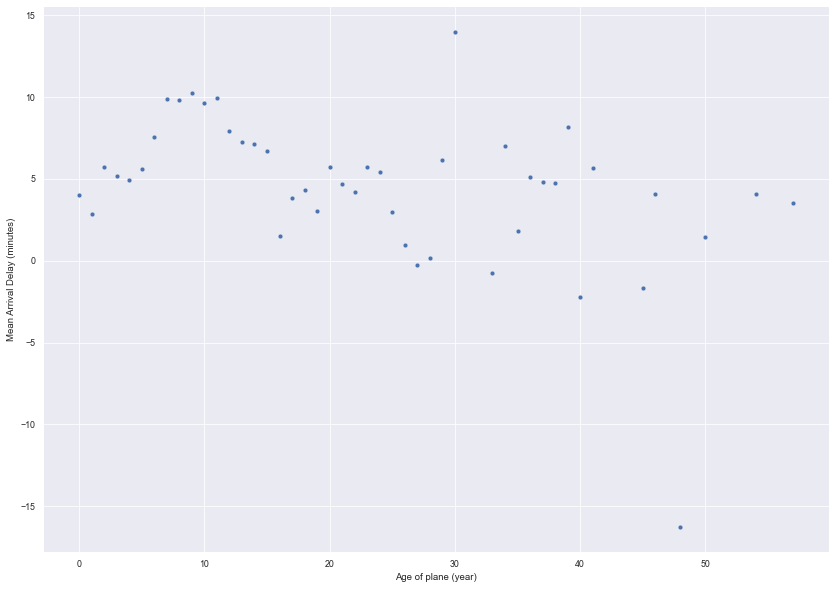

In [26]:
# Graph to answer the question
sns.set("paper")
g = sns.relplot(data = plane_age_delay, x='age', y='arr_delay_mean',
               kind='scatter',height=8.27, aspect=11.7/8.27)

g.set_xlabels("Age of plane (year)")
g.set_ylabels("Mean Arrival Delay (minutes)")

plt.show()

<hr style="border:1px solid black">

7. What weather conditions make it more likely to see a delay?

We only checked for **wind speed**

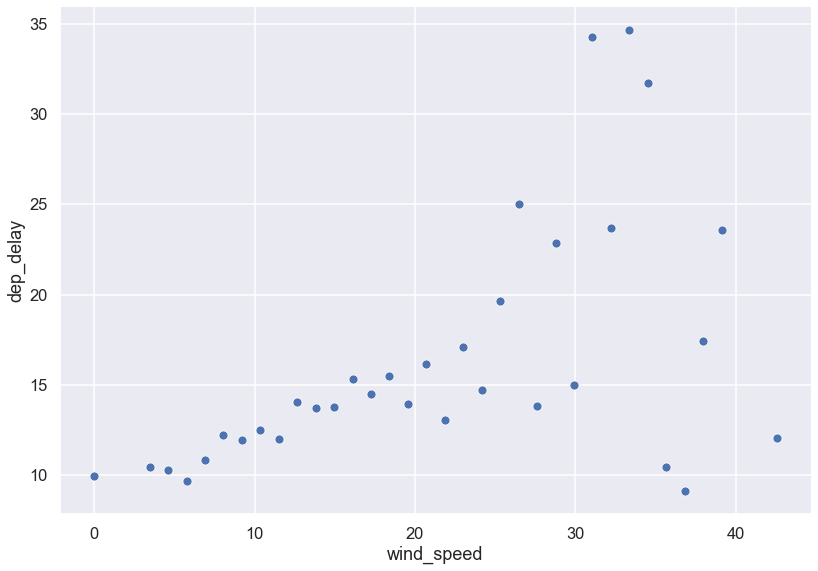

In [25]:
sns.set('talk')
flights4 = flights.filter(["year","month","day", "hour","origin", 
                   "dep_delay", "arr_delay"])

flights_weather_df = flights4.merge(weather,
                                    on = ["origin","year","month",
                             "day","hour"], how = "inner").\
groupby("wind_speed").agg({'dep_delay': 'mean'}).reset_index()

sns.relplot(data=flights_weather_df, x='wind_speed', y='dep_delay',
            kind='scatter',height=8.27, aspect=11.7/8.27)

plt.show()

<hr style="border:1px solid black">

8. Find the 48 flights (over the course of the whole year) that have the worst delays. Cross-reference it with the weather data. Can you see any patterns?

In [35]:
worst_hours = flights.\
groupby(['origin', 'year', 'month', 'day', 'hour']).\
agg({'dep_delay':'mean'}).\
reset_index().\
sort_values('dep_delay', ascending = False).\
iloc[0:48,:].\
sort_values('origin')

worst_hours.head()

,origin,year,month,day,hour,dep_delay
4341,EWR,2013,9,12,17,217.142857
669,EWR,2013,2,9,10,269.000000
668,EWR,2013,2,9,9,266.000000
3081,EWR,2013,6,30,16,167.642857
1136,EWR,2013,3,8,14,156.538462


In [63]:
# semi_join
weather_new = weather.reset_index().rename(columns = {'index': 'key'})

df = weather_new.merge(worst_hours, 
                   how = "left", 
                   on = ["origin", "year", "month", "day", "hour"], 
                   indicator = True)

key_list = df.loc[df._merge == "both", 'key']

weather_most_delayed = weather_new[weather_new['key'].isin(key_list)]
weather_most_delayed.head()

,key,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
943,943,EWR,2013,2,9,9,26.96,17.06,65.84,310.0,13.80936,28.76950,0.00,1015.2,10.00,2013-02-09T14:00:00Z
944,944,EWR,2013,2,9,10,28.04,15.98,60.10,310.0,19.56326,28.76950,0.00,1016.5,10.00,2013-02-09T15:00:00Z
945,945,EWR,2013,2,9,11,28.94,15.98,57.92,320.0,28.76950,35.67418,0.00,1016.8,10.00,2013-02-09T16:00:00Z
1591,1591,EWR,2013,3,8,12,33.80,32.00,95.75,320.0,9.20624,NaN,0.06,NaN,1.00,2013-03-08T17:00:00Z
1593,1593,EWR,2013,3,8,14,33.98,33.08,96.46,320.0,8.05546,NaN,0.05,NaN,1.75,2013-03-08T19:00:00Z


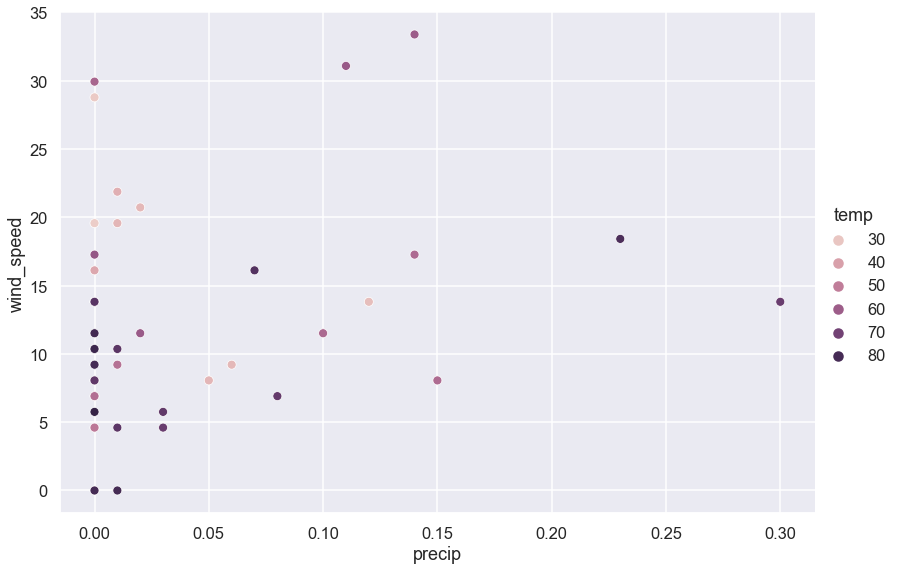

In [70]:
sns.set('talk')
sns.relplot(data=weather_most_delayed, x='precip', y='wind_speed', kind = 'scatter',
               hue='temp', height=8.27, aspect=11.7/8.27)

plt.show()

<hr style="border:1px solid black">

9. You might expect that there’s an implicit relationship between plane and airline, because each plane is flown by a single airline. Confirm or reject this hypothesis using the tools you’ve learned above.

At each point in time, each plane is flown by a single airline.
However, a plane can be sold and fly for multiple airlines.
let’s check to see if there are any planes in the data flew
for multiple airlines.


In [93]:
planes_carriers = flights.query('tailnum.notnull()').\
filter(['tailnum', 'carrier']).drop_duplicates()

planes_carriers

,tailnum,carrier
0,N14228,UA
1,N24211,UA
2,N619AA,AA
3,N804JB,B6
4,N668DN,DL
...,...,...
327436,N766SK,OO
329041,N772SK,OO
330033,N776SK,OO
331007,N785SK,OO


In [99]:
planes_carriers.groupby('tailnum').\
agg({'carrier':'count'}).\
reset_index().\
rename(columns = {'carrier':'n'}).\
query('n>1').shape[0]

17

In [109]:
planes_filter = planes_carriers.groupby('tailnum').\
agg({'carrier':'count'}).\
reset_index().\
rename(columns = {'carrier':'n'})

planes_carriers.merge(planes_filter, how = 'left', on='tailnum').\
query('n>1').merge(airlines, on = 'carrier', how = 'left').\
sort_values(['tailnum','carrier']).drop('n', axis = 1).head()

,tailnum,carrier,name
6,N146PQ,9E,Endeavor Air Inc.
22,N146PQ,EV,ExpressJet Airlines Inc.
7,N153PQ,9E,Endeavor Air Inc.
24,N153PQ,EV,ExpressJet Airlines Inc.
12,N176PQ,9E,Endeavor Air Inc.


<hr style="border:1px solid black">

10. Select flights information for the top 10 popular destination.

In [118]:
top_dest = flights.groupby('dest').agg({"dep_delay":"count"}).reset_index().\
rename(columns = {'dep_delay':'n'}).sort_values('n', ascending = False).iloc[0:10,0]

top_dest

4     ATL
69    ORD
49    LAX
11    BOS
54    MCO
23    CLT
90    SFO
35    FLL
58    MIA
28    DCA
Name: dest, dtype: object

In [123]:
# Semi Join
flights.loc[flights['dest'].isin(top_dest),:]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-10-01T01:00:00Z
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-10-01T01:00:00Z
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-10-01T00:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z


<hr style="border:1px solid black">

11. Select the flights that do not have any information of plane year and manufacturer.

In [137]:
flights_plane_df = flights.merge(planes, how = "left", 
              on = "tailnum", indicator = True)

key_list = flights_plane_df.loc[flights_plane_df._merge == 'left_only', "tailnum"]

flights_no_manu = flights[flights['tailnum'].isin(key_list)]

flights_no_manu.value_counts('tailnum', dropna = False)

tailnum
NaN       2512
N725MQ     575
N722MQ     513
N723MQ     507
N713MQ     483
          ... 
N7AEAA       1
N5DJAA       1
N7ACAA       1
N7CAAA       1
N7BVAA       1
Length: 722, dtype: int64

In [141]:
flights.query('tailnum == "N725MQ"')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
144,2013,1,1,832.0,840,-8.0,1006.0,1030,-24.0,MQ,4521,N725MQ,LGA,RDU,77.0,431,8,40,2013-01-01T13:00:00Z
355,2013,1,1,1305.0,1315,-10.0,1523.0,1520,3.0,MQ,4564,N725MQ,LGA,DTW,102.0,502,13,15,2013-01-01T18:00:00Z
671,2013,1,1,1840.0,1845,-5.0,2055.0,2030,25.0,MQ,4517,N725MQ,LGA,CRW,96.0,444,18,45,2013-01-01T23:00:00Z
1215,2013,1,2,1205.0,1205,0.0,1349.0,1345,4.0,MQ,4431,N725MQ,LGA,RDU,86.0,431,12,5,2013-01-02T17:00:00Z
1560,2013,1,2,1805.0,1810,-5.0,1946.0,1945,1.0,MQ,4484,N725MQ,LGA,BNA,134.0,764,18,10,2013-01-02T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332235,2013,9,26,620.0,625,-5.0,739.0,800,-21.0,MQ,3525,N725MQ,LGA,RDU,65.0,431,6,25,2013-09-26T10:00:00Z
332764,2013,9,26,1500.0,1505,-5.0,1652.0,1655,-3.0,MQ,3391,N725MQ,LGA,CMH,74.0,479,15,5,2013-09-26T19:00:00Z
334795,2013,9,28,1856.0,1900,-4.0,2030.0,2040,-10.0,MQ,3591,N725MQ,LGA,RDU,70.0,431,19,0,2013-09-28T23:00:00Z
335551,2013,9,29,1754.0,1755,-1.0,2019.0,2015,4.0,MQ,3713,N725MQ,LGA,XNA,160.0,1147,17,55,2013-09-29T21:00:00Z


In [142]:
planes.query('tailnum == "N725MQ"')

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine


<hr style="border:1px solid black">